In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
df = pd.read_csv('/content/loan_data.csv')

In [14]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [16]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [17]:
#variance Calculation for numerical Columns
for column in df.select_dtypes(include=np.number).columns:
       variance = np.var(df[column])
       print(f"Variance of column '{column}': {variance}")

Variance of column 'person_age': 36.5425212128415
Variance of column 'person_income': 6467634557.790885
Variance of column 'person_emp_exp': 36.76560433334122
Variance of column 'loan_amnt': 39876907.74117554
Variance of column 'loan_int_rate': 8.873101585922724
Variance of column 'loan_percent_income': 0.007605817647208681
Variance of column 'cb_person_cred_hist_length': 15.051751916544712
Variance of column 'credit_score': 2543.7199500068837
Variance of column 'loan_status': 0.1728395061726708


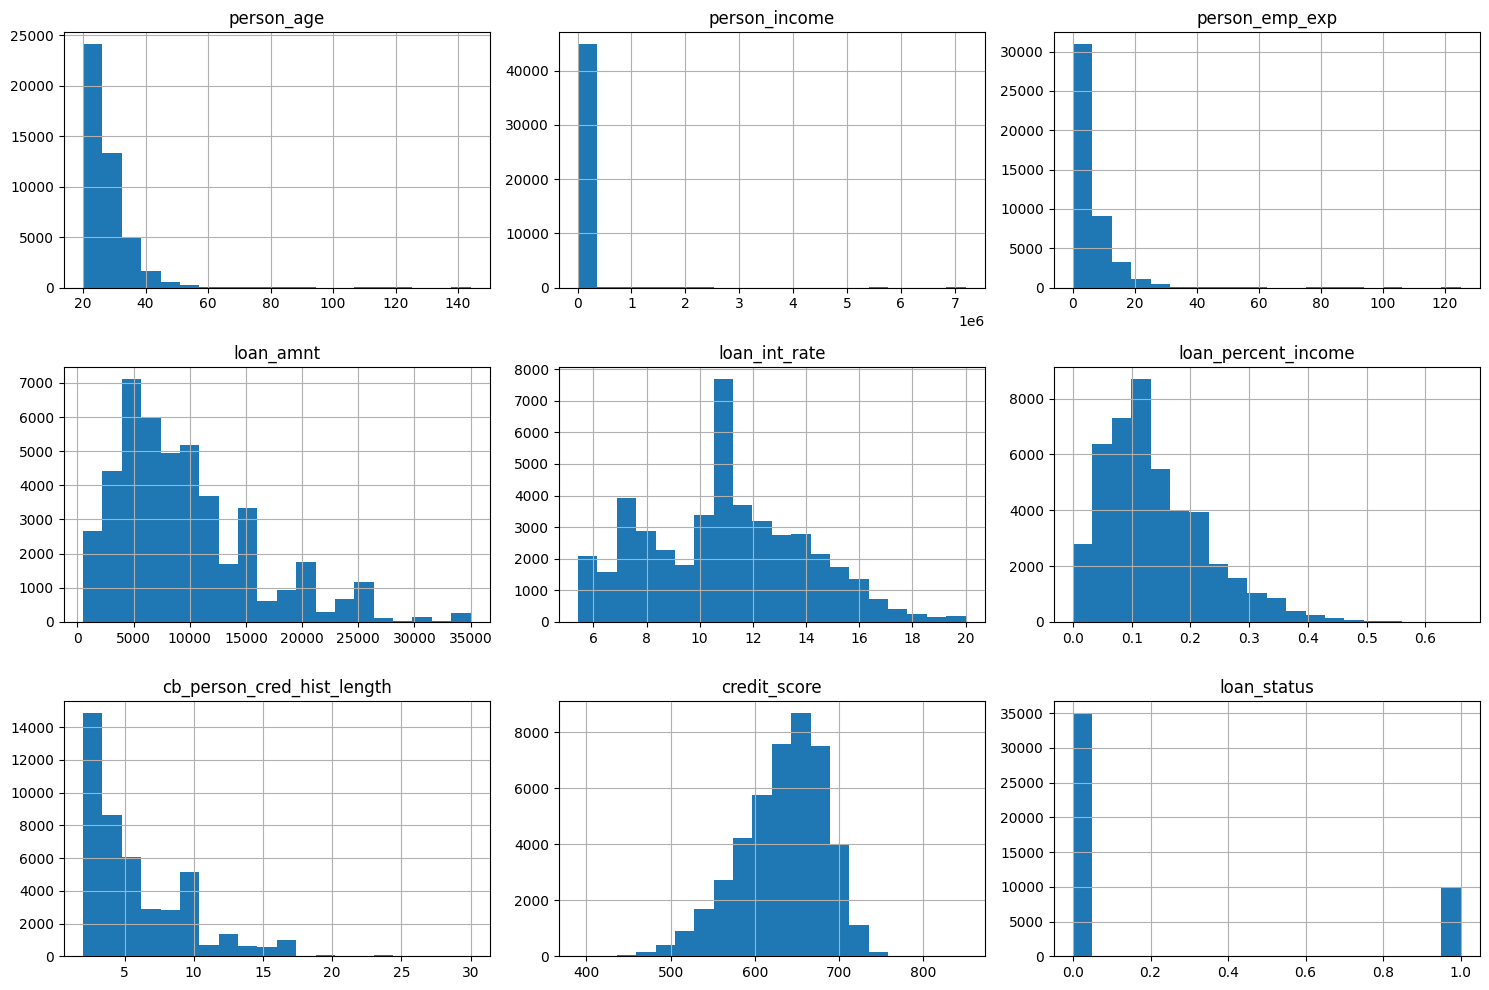

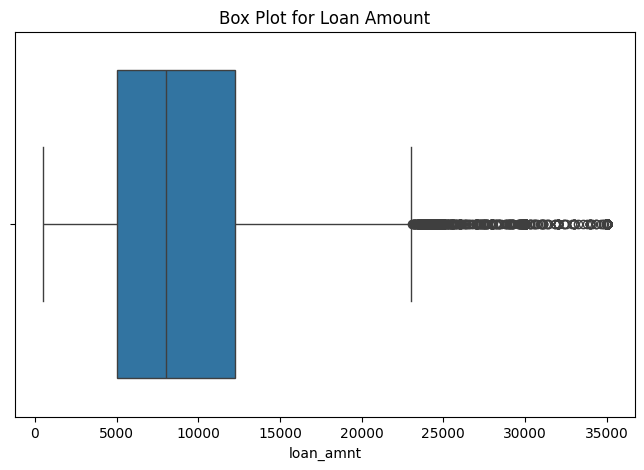

In [18]:
# Data Visualization: Histograms for numeric variables
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()


# Boxplot for loan amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loan_amnt'])
plt.title("Box Plot for Loan Amount")
plt.show()




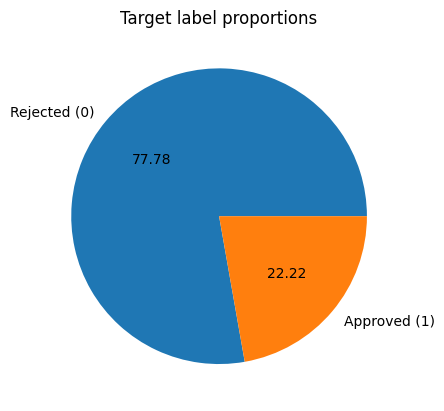

In [19]:
#Data Visualisation
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

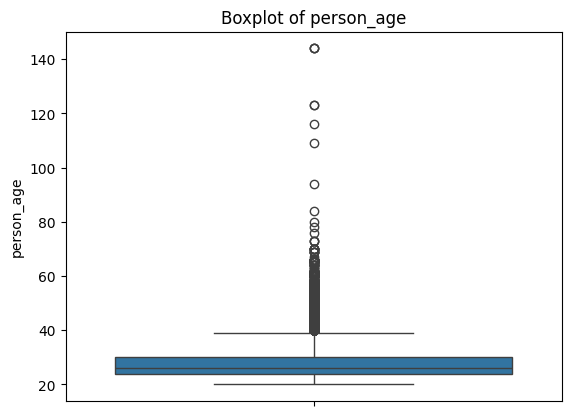

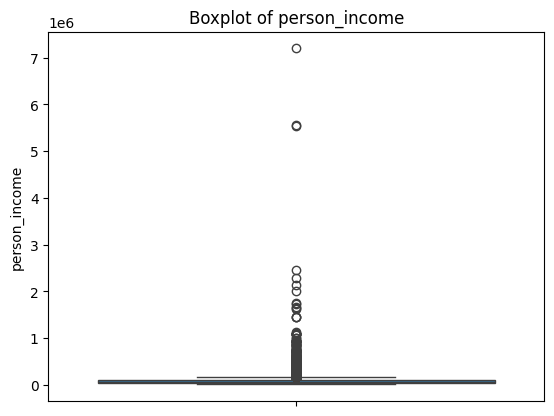

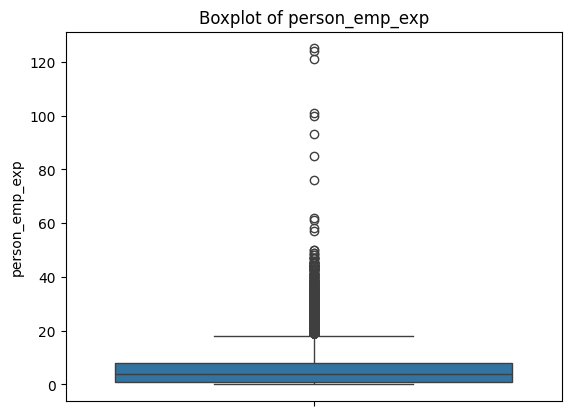

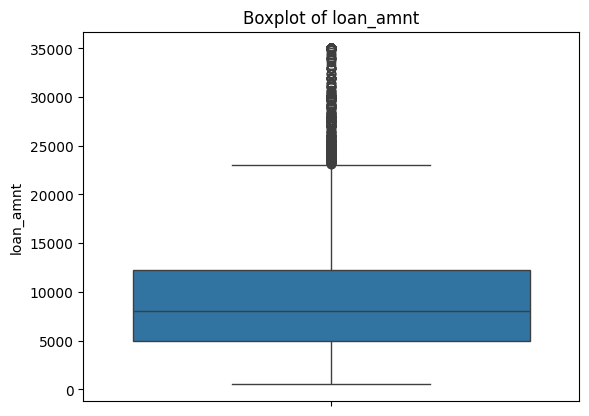

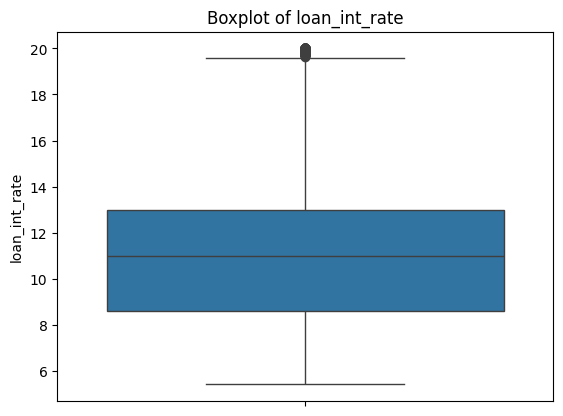

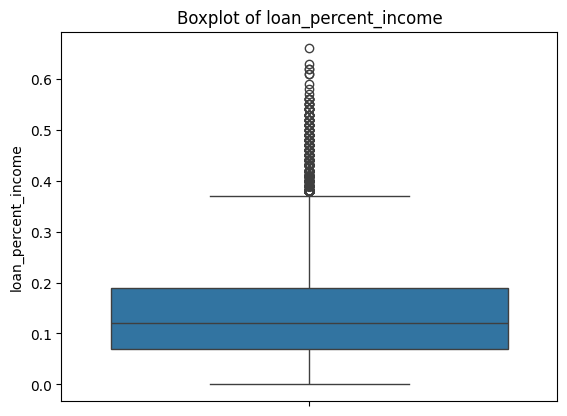

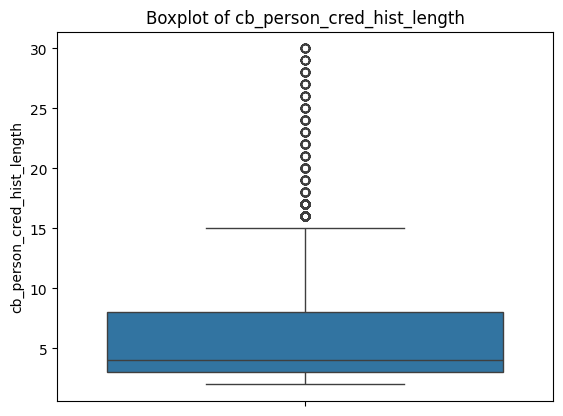

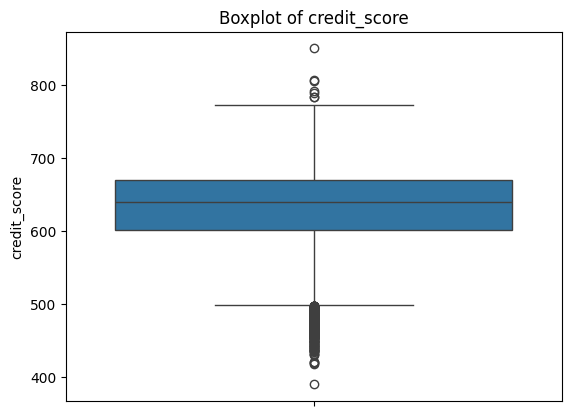

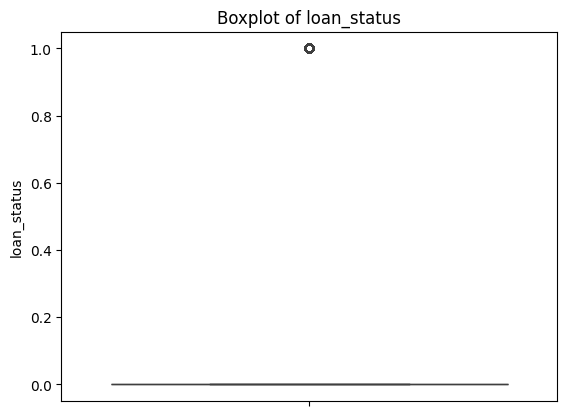

In [20]:
numerical = df.select_dtypes(include = 'number').columns
for col in numerical:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


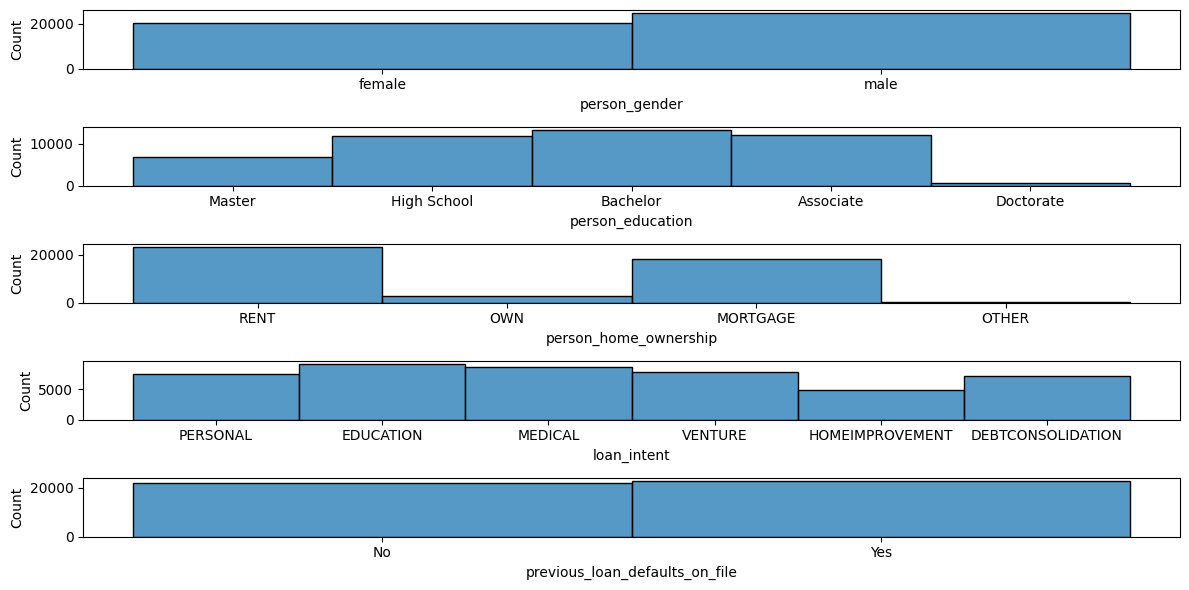

In [21]:
categorical = df.select_dtypes(include = 'object').columns

plt.figure(figsize = (12,6))
for i, col in enumerate(categorical):
    plt.subplot(5,1, i + 1)
    sns.histplot(df[col])

plt.tight_layout()

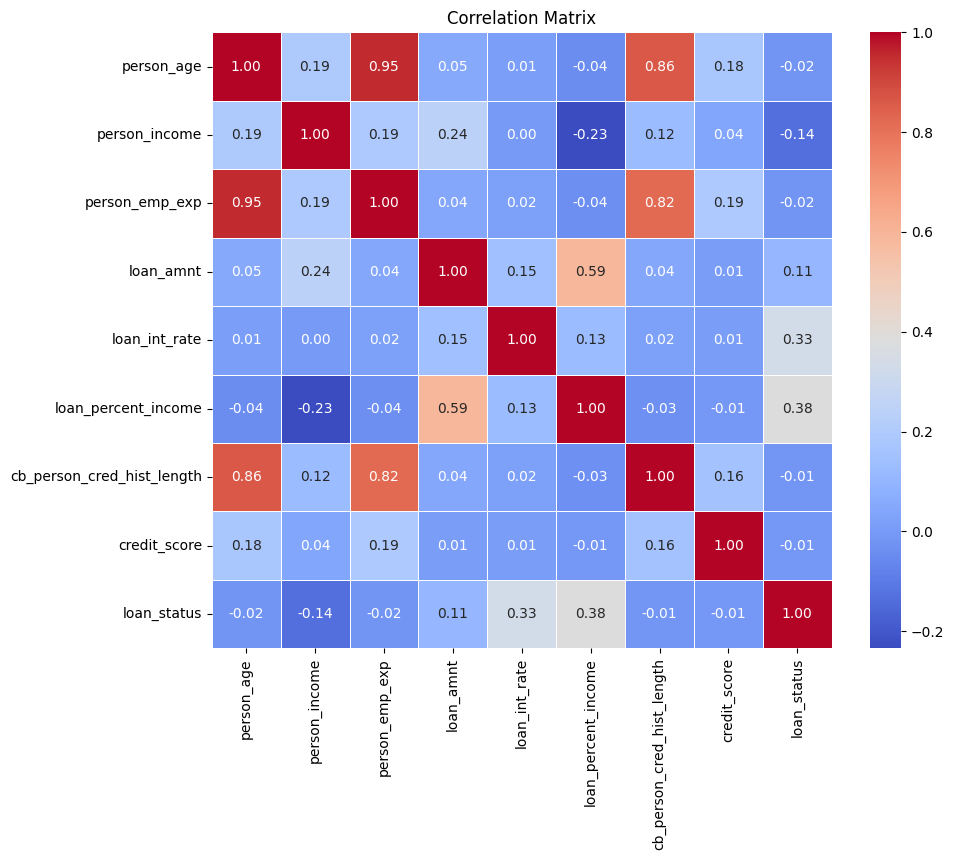

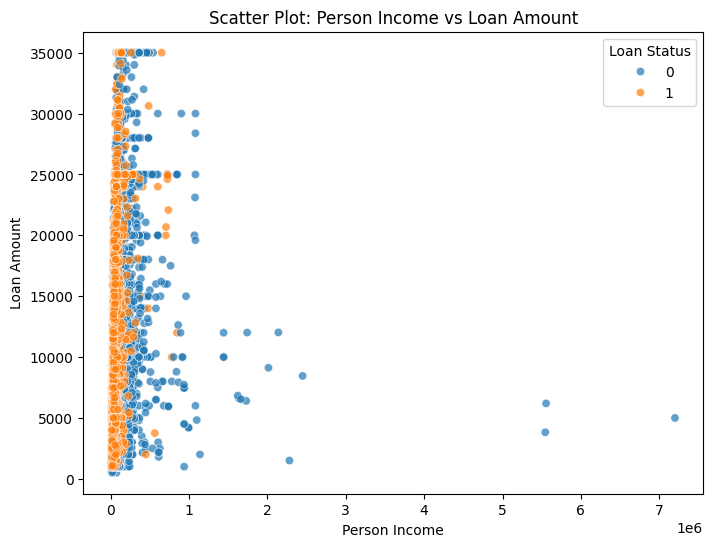

In [22]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Scatter plot for specific variables (example: loan amount vs person income)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='person_income', y='loan_amnt', data=df, hue='loan_status', alpha=0.7)
plt.title("Scatter Plot: Person Income vs Loan Amount")
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.show()



Categorical Variables: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Frequency Table for person_gender:

person_gender
male      24841
female    20159
Name: count, dtype: int64

Frequency Table for person_education:

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Frequency Table for person_home_ownership:

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Frequency Table for loan_intent:

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Frequency Table for previous_loan_defaults_on_file:

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


/tmp/ipython-input-3716571660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


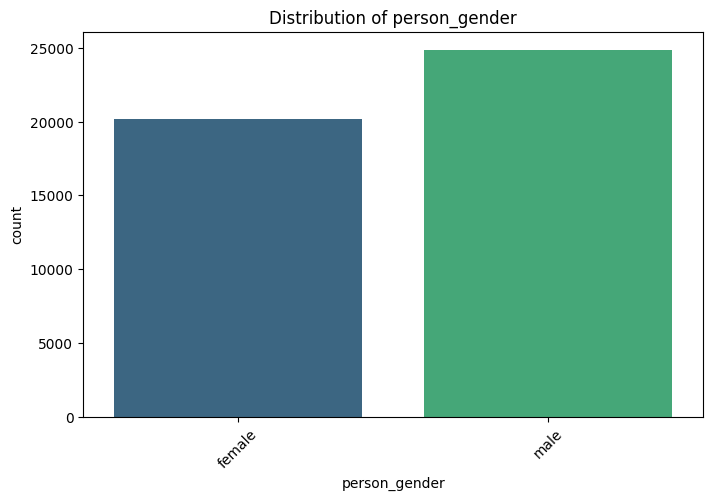

/tmp/ipython-input-3716571660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


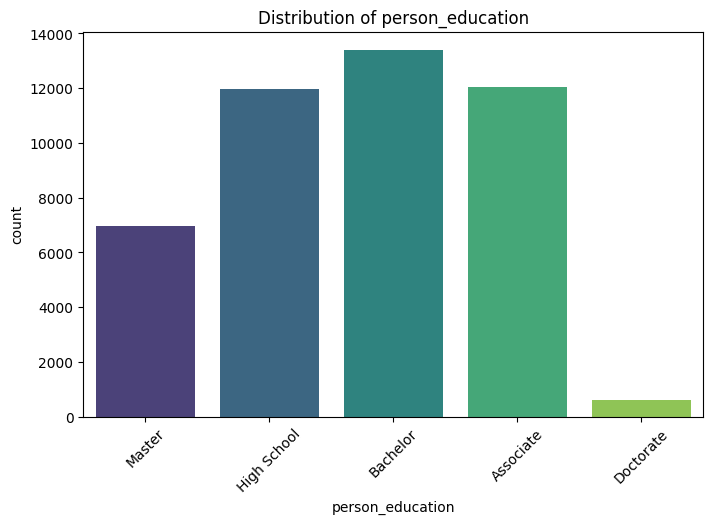

/tmp/ipython-input-3716571660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


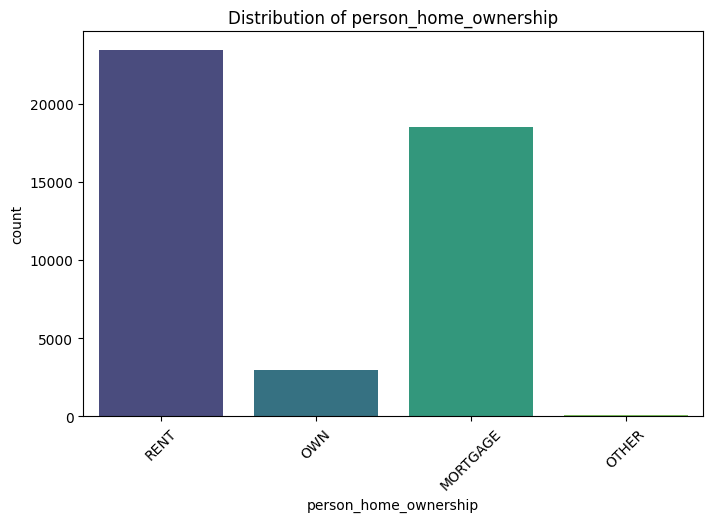

/tmp/ipython-input-3716571660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


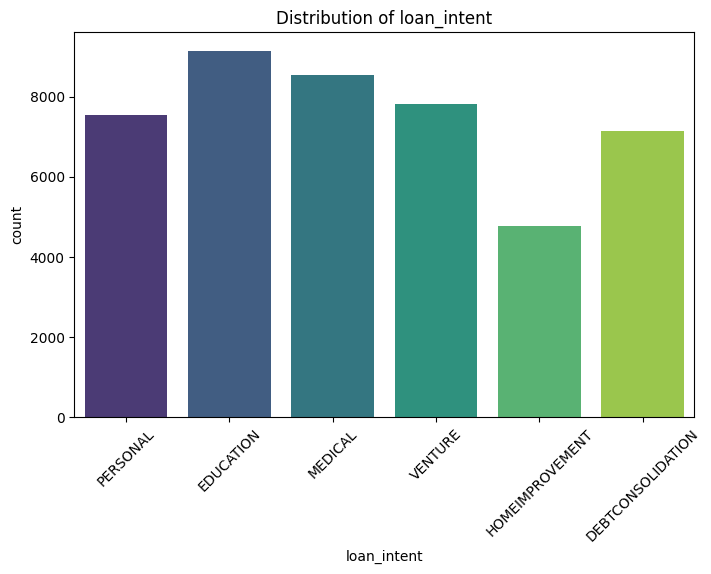

/tmp/ipython-input-3716571660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


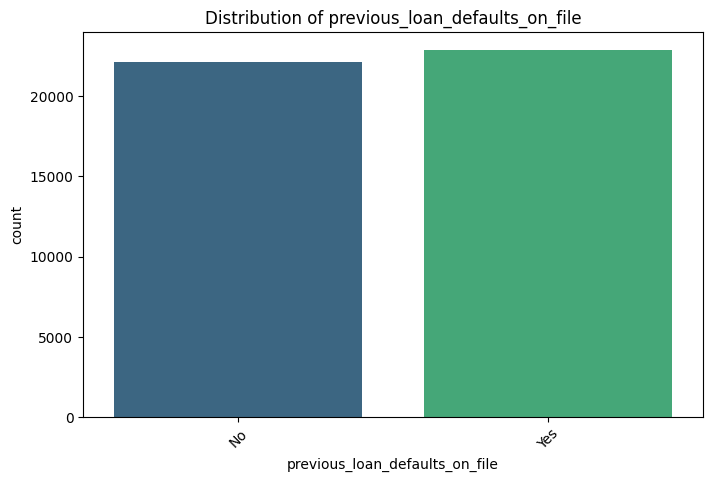

In [23]:
#Categorical columns

# Define categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_columns)

# Frequency tables for categorical variables
for col in categorical_columns:
    print(f"\nFrequency Table for {col}:\n")
    print(df[col].value_counts())

# Bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [24]:
# 1. Hypothesis 1: Higher income leads to higher loan approval
approved = df[df['loan_status'] == 'Approved']['person_income']
not_approved = df[df['loan_status'] == 'Rejected']['person_income']

# Perform a t-test
t_stat, p_value = ttest_ind(approved, not_approved, equal_var=False)
print("Hypothesis 1: Income vs Loan Approval")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Income significantly influences loan approval.\n")
else:
    print("Fail to reject the null hypothesis: No significant influence of income on loan approval.\n")

# 2. Hypothesis 2: Higher credit score leads to higher loan approval
approved_credit = df[df['loan_status'] == 'Approved']['credit_score']
not_approved_credit = df[df['loan_status'] == 'Rejected']['credit_score']

# Perform a t-test
t_stat, p_value = ttest_ind(approved_credit, not_approved_credit, equal_var=False)
print("Hypothesis 2: Credit Score vs Loan Approval")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Credit score significantly influences loan approval.\n")
else:
    print("Fail to reject the null hypothesis: No significant influence of credit score on loan approval.\n")

# 3. Hypothesis 3: Loan intent affects loan approval
contingency_table = pd.crosstab(df['loan_intent'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Hypothesis 3: Loan Intent vs Loan Approval")
print(f"Chi-Square Statistic: {chi2:.3f}, P-value: {p:.3f}")
if p < 0.05:
    print("Reject the null hypothesis: Loan intent significantly affects loan approval.\n")
else:
    print("Fail to reject the null hypothesis: Loan intent does not significantly affect loan approval.\n")

# 4. Hypothesis 4: Gender and loan approval are independent
contingency_table_gender = pd.crosstab(df['person_gender'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)
print("Hypothesis 4: Gender Bias in Loan Approval")
print(f"Chi-Square Statistic: {chi2:.3f}, P-value: {p:.3f}")
if p < 0.05:
    print("Reject the null hypothesis: Loan approval rates depend on gender.\n")
else:
    print("Fail to reject the null hypothesis: Loan approval rates are independent of gender.\n")

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Hypothesis 1: Income vs Loan Approval
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant influence of income on loan approval.

Hypothesis 2: Credit Score vs Loan Approval
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant influence of credit score on loan approval.

Hypothesis 3: Loan Intent vs Loan Approval
Chi-Square Statistic: 909.648, P-value: 0.000
Reject the null hypothesis: Loan intent significantly affects loan approval.

Hypothesis 4: Gender Bias in Loan Approval
Chi-Square Statistic: 0.012, P-value: 0.914
Fail to reject the null hypothesis: Loan approval rates are independent of gender.



In [25]:

# Define the categorical columns
binary_columns = ['person_gender', 'previous_loan_defaults_on_file']  # Binary categories
multi_category_columns = ['person_education', 'person_home_ownership', 'loan_intent']  # Multi-category

# Label Encoding for Binary Categorical Columns
label_encoders = {}
for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding for Multi-category Columns
df = pd.get_dummies(df, columns=multi_category_columns, drop_first=True)

# Define features and target
X = df.drop(columns=['loan_status'])  # Features (all columns except 'loan_status')
y = df['loan_status']                # Target variable (loan approval status)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 1. Logistic Regression Model
print("Logistic Regression Model")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test)

# 2. Decision Tree Classifier
print("\nDecision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

# 3. Random Forest Classifier
print("\nRandom Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

# Compare model performances
models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

# Calculate and print accuracy for all models
print("\nModel Comparison:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}")


Logistic Regression Model
Accuracy: 0.8963703703703704
Precision: 0.783362831858407
Recall: 0.7376666666666667
F1 Score: 0.7598283261802575

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     10500
           1       0.78      0.74      0.76      3000

    accuracy                           0.90     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.90      0.90     13500

Confusion Matrix:
 [[9888  612]
 [ 787 2213]]

Decision Tree Classifier
Accuracy: 0.9088148148148149
Precision: 0.850019786307875
Recall: 0.716
F1 Score: 0.7772751944997286

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     10500
           1       0.85      0.72      0.78      3000

    accuracy                           0.91     13500
   macro avg       0.89      0.84      0.86     13500
weighted avg       0.91      0.91     